In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
# Load the Datafrom CSV
df=pd.read_csv("/home/sathish/Downloads/restaurant_data.csv (2)")

In [22]:
df

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


In [23]:
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [24]:
df.tail()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48
8367,Restaurant 8367,Rural,Japanese,4.0,33,71.07,2003,24268,8,197,151.838065,5.9,7.5,Yes,5,12,534142.98


In [25]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [27]:
df.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [18]:
df.describe()

,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,2014.542857,8.392857,91.971429,19.071429,9.664286
std,1.121224,0.490139,47.494027,23.280165,10.149679
min,2013.000000,8.000000,17.000000,0.000000,0.000000
25%,2014.000000,8.000000,62.750000,2.000000,1.000000
50%,2015.000000,8.000000,86.000000,12.000000,6.000000
75%,2016.000000,9.000000,113.000000,26.000000,14.000000
max,2016.000000,9.000000,344.000000,118.000000,45.000000


In [26]:
columns_to_impute=['Name','Location','Cuisine','Rating','Seating Capacity','Average Meal Price','Marketing Budget','Social Media Followers','Chef Experience Years','Number of Reviews','Avg Review Length','Ambience Score','Service Quality Score','Parking Availability','Weekend Reservations','Weekday Reservations','Revenue']
for i in columns_to_impute:
    print("how many unique value for ",i," : ",df[i].nunique())

how many unique value for  Name  :  8368
how many unique value for  Location  :  3
how many unique value for  Cuisine  :  6
how many unique value for  Rating  :  21
how many unique value for  Seating Capacity  :  61
how many unique value for  Average Meal Price  :  3966
how many unique value for  Marketing Budget  :  4396
how many unique value for  Social Media Followers  :  7799
how many unique value for  Chef Experience Years  :  19
how many unique value for  Number of Reviews  :  949
how many unique value for  Avg Review Length  :  8368
how many unique value for  Ambience Score  :  91
how many unique value for  Service Quality Score  :  91
how many unique value for  Parking Availability  :  2
how many unique value for  Weekend Reservations  :  89
how many unique value for  Weekday Reservations  :  89
how many unique value for  Revenue  :  8368


In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Cuisine'] = label_encoder.fit_transform(df['Cuisine'])

In [52]:
df1=df[['Location','Cuisine','Rating','Seating Capacity','Average Meal Price','Marketing Budget','Social Media Followers','Chef Experience Years','Number of Reviews','Avg Review Length','Ambience Score','Service Quality Score','Weekend Reservations','Weekday Reservations','Revenue']]

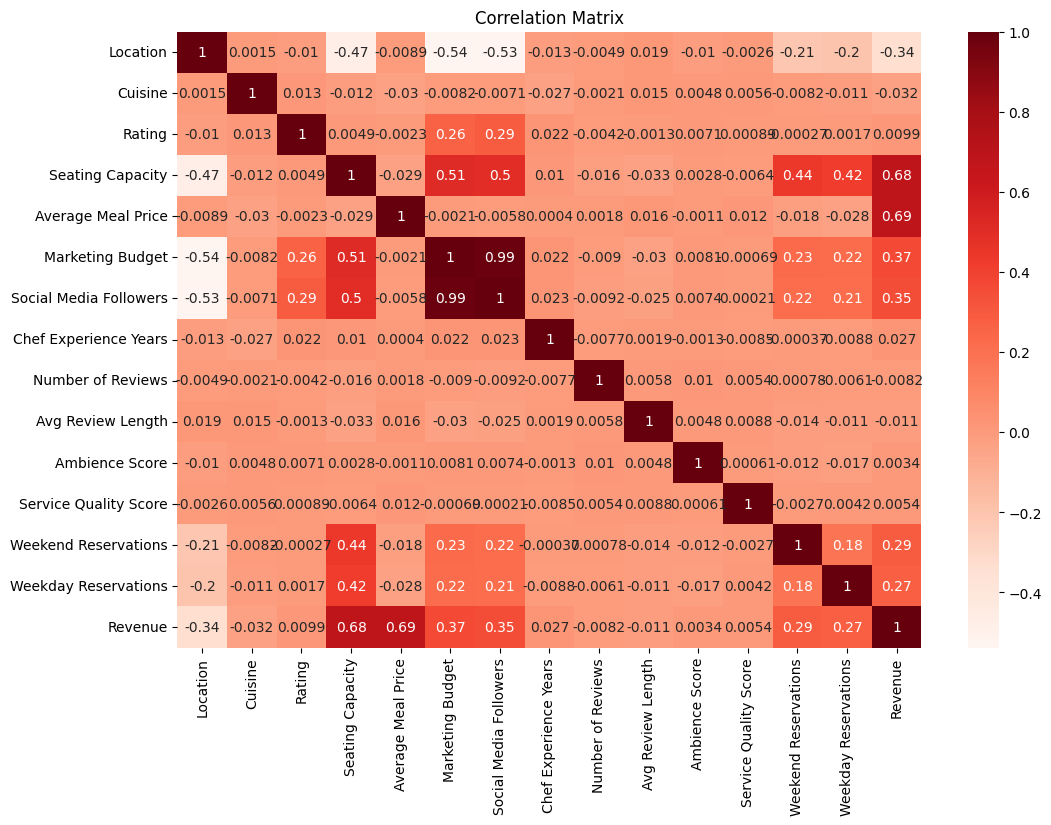

In [54]:
correlation_matrix=df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                8368 non-null   int64  
 1   Cuisine                 8368 non-null   int64  
 2   Rating                  8368 non-null   float64
 3   Seating Capacity        8368 non-null   int64  
 4   Average Meal Price      8368 non-null   float64
 5   Marketing Budget        8368 non-null   int64  
 6   Social Media Followers  8368 non-null   int64  
 7   Chef Experience Years   8368 non-null   int64  
 8   Number of Reviews       8368 non-null   int64  
 9   Avg Review Length       8368 non-null   float64
 10  Ambience Score          8368 non-null   float64
 11  Service Quality Score   8368 non-null   float64
 12  Weekend Reservations    8368 non-null   int64  
 13  Weekday Reservations    8368 non-null   int64  
 14  Revenue                 8368 non-null   

In [56]:
x=df1[['Rating','Seating Capacity','Marketing Budget','Social Media Followers','Weekend Reservations','Weekday Reservations']]
y=df1['Revenue']

In [57]:
x

,Rating,Seating Capacity,Marketing Budget,Social Media Followers,Weekend Reservations,Weekday Reservations
0,4.0,38,2224,23406,13,4
1,3.2,76,4416,42741,48,6
2,4.7,48,2796,37285,27,14
3,4.4,34,1167,15214,9,17
4,4.9,88,3639,40171,37,26
...,...,...,...,...,...,...
8363,3.4,54,1102,11298,37,0
8364,3.7,49,1988,20432,37,21
8365,4.7,88,5949,63945,83,21
8366,3.1,31,707,7170,6,21


In [58]:
y

0        638945.52
1        490207.83
2        541368.62
3        404556.80
4       1491046.35
           ...    
8363     434653.45
8364     414977.92
8365     930395.87
8366     311493.48
8367     534142.98
Name: Revenue, Length: 8368, dtype: float64

In [59]:
# splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
x_train

,Rating,Seating Capacity,Marketing Budget,Social Media Followers,Weekend Reservations,Weekday Reservations
7356,3.6,79,2758,28697,24,2
8307,3.1,50,2551,25307,41,46
208,4.5,86,7360,73821,84,10
5303,4.1,87,3891,45053,2,54
747,5.0,57,2952,33049,50,35
...,...,...,...,...,...,...
5734,3.9,64,3898,39153,14,11
5191,4.7,75,3612,38504,18,4
5390,4.6,82,4317,47772,62,49
860,3.9,50,1958,23722,7,16


In [61]:
y_train

7356    1039141.83
8307     492700.66
208     1035240.81
5303    1436755.13
747      902402.29
           ...    
5734     665759.32
5191    1091155.51
5390     771692.82
860      412777.80
7270     789980.10
Name: Revenue, Length: 6694, dtype: float64

In [62]:
# building the linear regression model
model1=LinearRegression()

#fitting the model on the training data
model1.fit(x_train,y_train)

LinearRegression()

In [63]:
# model evaluation
y_pred=model1.predict(x_test)

In [75]:
y_pred

array([562963.52135582, 472516.96369503, 421385.82647064, ...,
       872818.85253583, 843038.3602136 , 617128.07089023])

In [79]:
len(x_test)

1674

In [78]:
len(y_pred)

1674

In [64]:
#mean squared error and R-squared for model evaluation
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [65]:
print("Mean Squred Error :",mse)
print("R-squared:",r2)

Mean Squred Error : 39147625909.257065
R-squared: 0.45379332610094225


In [66]:
# mean squred error and r-squared for model evaluation
mse=mean_squared_error(y_test,y_pred)
r3=r2_score(y_test,y_pred)
print("Mean squared error :",mse)
print("R_squared",r3)

Mean squared error : 39147625909.257065
R_squared 0.45379332610094225


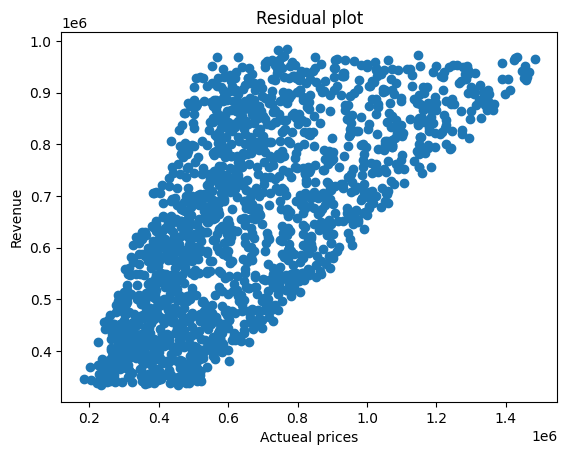

In [69]:
# predicttion and visualization 
# to visualize the prediction against actual prices weell use a scatter plot
plt.scatter(y_test,y_pred)
plt.xlabel("Actueal prices")
plt.ylabel("Revenue")
plt.title("Residual plot")
plt.show()

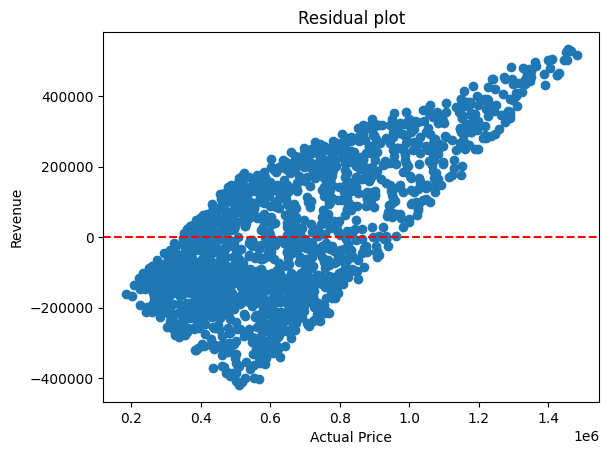

In [70]:
residual=y_test-y_pred
plt.scatter(y_test,residual)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Revenue")
plt.title("Residual plot")
plt.show()

In [71]:
# lastly, lets use the trained model to make predictions on new data and visualize the results
new_data=[[4.3,80,6080,51708,60,26]]
predicted_price=model1.predict(new_data)
print("predicted price:",predicted_price[0])

predicted price: 885194.5780643359


/home/sathish/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [73]:
# lastly, lets use the trained model to make predictions on new data and visualize the results
new_data1=[[3.8,63,4579,39127,90,10]]
predicted_price=model1.predict(new_data1)
print("predicted price:",predicted_price[0])

predicted price: 702786.8857781587


/home/sathish/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
# lastly, lets use the trained model to make predictions on new data and visualize the results
new_data1=[[3.6,79,2758,28697,24,2]]
predicted_price=model1.predict(new_data1)
print("predicted price:",predicted_price[0])

predicted price: 854871.0044735519


/home/sathish/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [81]:
from sklearn.metrics import mean_absolute_error

In [84]:
mae=mean_absolute_error(y_test,y_pred)
print('The MAE is : ',mae)

The MAE is :  166789.70313477292


In [85]:
df1['Revenue'].mean()

656070.5633508605

In [93]:
MAE=166789.70313477292/656070.5633508605*100
MAE

25.422525022750538

In [94]:
import numpy as np

In [96]:
mse=mean_squared_error(y_test,y_pred)
print('The MSE is : ',mse)

The MSE is :  39147625909.257065


In [95]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('The RMSE is : ',rmse)

The RMSE is :  197857.58997131514
